# PairK examples

##  why z-scores?

When assessing sequence conservation, it is important to ensure that observed conservation is do to functional selection rather than a lack of divergence. In order to identify sequence elements that are important for function, the genes must have diverged enough for those important elements to stand out relative to the background. Further complicating the matter, genes evolve at different rates. A simple approach to account for background divergence is to cluster homologous sequences such that there is good background divergence across the homologs. Using a z-score is another option as it scores each position relative to the conservation of all other positions in the alignment.

Using z-scores is particularly important when interpreting the results from PairK. This is true regardless of the background divergence of the homologs. Sequence conservation from PairK is extra susceptible to over-estimation due to the fact that k-mer alignments contain less information than global alignments. For example, using k=2 will likely result in extremely high conservation scores due to the fact that the homologs have a high probability of having a matching 2-mer by chance. In this case the regular conservation score will be high and the sequence logo will look good, but the z-score will be low. Thus, conservation with pairk should not be interpreted by the sequence logos alone. PairK's plotting functions are included to help with interpretting the results of pairk. 

The below examples demonstrate these points and walk through the process of interpreting PairK results.

### Example 1: PairK with k=1

In [30]:
example_idrs = {
    'query': 'AFSSSGSFPPPPDDEDF',
    'homolog1_sequence': 'AFSEEGSFLPPPPGGGESSG',
    'homolog2_sequence': 'AEESSGSFPPPPPPPSGSGSEEGG',
    'homolog3_sequence': 'AEESSGSFPPPPAAGGSTEEE',
}

In [37]:
K=2

(-2.0, 2.0)

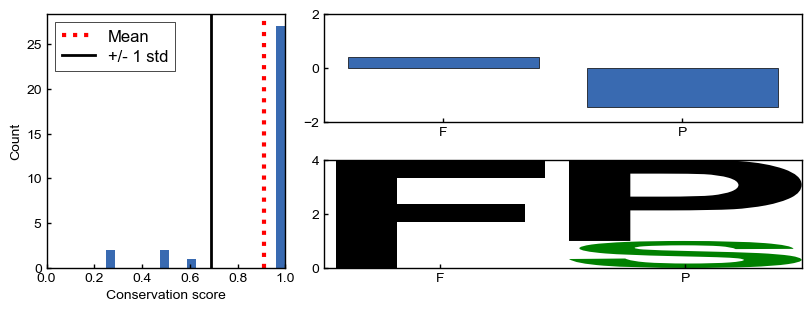

In [41]:
aln_results = pairk.pairk_alignment(
    idr_dict=example_idrs,
    query_id='query',
    k=K,
)
conservation_results = pairk.calculate_conservation(
    aln_results,
)
fig, axd = conservation_results.plot_conservation_mosaic(
    position=7,
    score_type='z_score',
    figsize=(8, 3)
)
axd['scores'].set_ylim([-2, 2])

In [42]:
conservation_results.bg_std

0.2183533397669633

In [36]:
conservation_results.z_score_arr

array([[ 0.10191779],
       [ 1.64047299],
       [ 0.10191779],
       [ 0.10191779],
       [ 0.10191779],
       [ 0.10191779],
       [ 0.10191779],
       [ 1.64047299],
       [-1.48514922],
       [-1.48514922],
       [-1.48514922],
       [-1.48514922],
       [ 0.10191779],
       [ 0.10191779],
       [ 0.10191779],
       [ 0.10191779],
       [ 1.64047299]])

In [1]:
import pairk

In [3]:
aln_results = pairk.pairk_alignment(
    idr_dict=example_idrs,
    query_id='query_sequence',
    k=5,
    matrix_name="EDSSMat50"
)

In [17]:
aln_results.find_query_kmer_positions("FPPPP")

[7]

(<Figure size 800x300 with 3 Axes>,
 {'background': <Axes: label='background', xlabel='Conservation score', ylabel='Count'>,
  'scores': <Axes: label='scores'>,
  'logo': <Axes: label='logo'>})

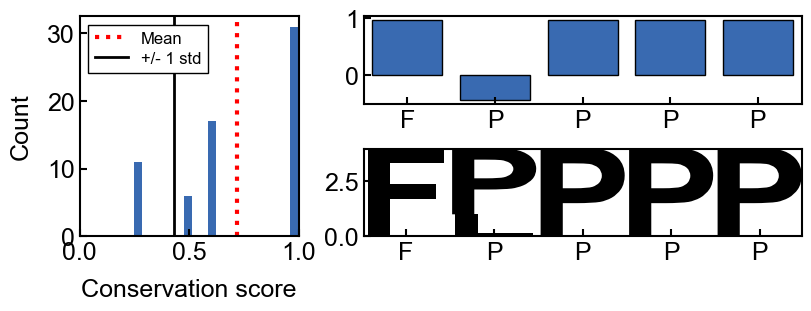

In [19]:
conservation_results.plot_conservation_mosaic(
    position=7,
    score_type='z_score',
    figsize=(8, 3)
)